<a href="https://colab.research.google.com/github/bayuardip/My-Project/blob/master/Happiness_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing CSV File

In [3]:
df = pd.read_csv("happydata.csv")

In [4]:
df.head()

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents,happy
0,3,3,3,4,2,4,0
1,3,2,3,5,4,3,0
2,5,3,3,3,3,5,1
3,5,4,3,3,3,5,0
4,5,4,3,3,3,5,0


In [5]:
df.tail()

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents,happy
138,5,3,3,1,3,5,0
139,5,2,3,4,2,5,1
140,5,3,3,4,4,5,1
141,4,3,3,4,4,5,0
142,5,3,2,5,5,5,0


In [6]:
df.shape

(143, 7)

In [7]:
df.columns

Index(['infoavail', 'housecost', 'schoolquality', 'policetrust',
       'streetquality', 'ëvents', 'happy'],
      dtype='object')

In [8]:
df.dtypes

infoavail        int64
housecost        int64
schoolquality    int64
policetrust      int64
streetquality    int64
ëvents           int64
happy            int64
dtype: object

# Checking NaN Values

In [9]:
df.isna().sum()

infoavail        0
housecost        0
schoolquality    0
policetrust      0
streetquality    0
ëvents           0
happy            0
dtype: int64

# Preprocessing

## Spliting Into X and y

In [10]:
X = df.iloc[:, :-1].values
y = df.iloc[:,-1].values

In [11]:
X

array([[3, 3, 3, 4, 2, 4],
       [3, 2, 3, 5, 4, 3],
       [5, 3, 3, 3, 3, 5],
       [5, 4, 3, 3, 3, 5],
       [5, 4, 3, 3, 3, 5],
       [5, 5, 3, 5, 5, 5],
       [3, 1, 2, 2, 1, 3],
       [5, 4, 4, 4, 4, 5],
       [4, 1, 4, 4, 4, 4],
       [4, 4, 4, 2, 5, 5],
       [3, 2, 3, 3, 2, 3],
       [4, 4, 3, 4, 4, 4],
       [5, 2, 4, 5, 5, 5],
       [4, 2, 4, 5, 4, 3],
       [4, 1, 3, 3, 4, 3],
       [3, 2, 4, 3, 4, 4],
       [5, 3, 4, 5, 4, 5],
       [5, 1, 4, 3, 4, 5],
       [5, 1, 2, 4, 4, 5],
       [4, 2, 4, 4, 4, 4],
       [4, 2, 3, 3, 4, 4],
       [4, 2, 3, 3, 4, 4],
       [4, 3, 5, 5, 5, 4],
       [4, 3, 5, 5, 5, 4],
       [5, 1, 2, 5, 2, 4],
       [4, 3, 3, 3, 3, 4],
       [3, 4, 3, 3, 2, 3],
       [3, 3, 3, 5, 5, 5],
       [3, 3, 1, 3, 3, 4],
       [3, 3, 1, 3, 3, 4],
       [5, 3, 3, 3, 5, 3],
       [5, 3, 3, 3, 5, 3],
       [4, 3, 3, 3, 4, 4],
       [4, 1, 3, 4, 4, 5],
       [3, 2, 4, 4, 4, 5],
       [3, 2, 4, 4, 4, 5],
       [4, 1, 3, 1, 1, 4],
 

In [12]:
y

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0])

## Train Test Split

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [14]:
X_train

array([[5, 3, 3, 4, 4, 4],
       [5, 3, 3, 3, 3, 5],
       [3, 3, 3, 5, 5, 5],
       [5, 3, 3, 4, 4, 5],
       [3, 2, 3, 3, 2, 3],
       [5, 2, 3, 3, 3, 3],
       [5, 2, 3, 4, 2, 5],
       [5, 1, 3, 3, 4, 4],
       [5, 2, 4, 5, 4, 5],
       [5, 2, 5, 5, 5, 3],
       [5, 3, 3, 3, 2, 5],
       [5, 2, 2, 4, 5, 5],
       [5, 3, 3, 3, 5, 5],
       [5, 3, 2, 4, 4, 4],
       [5, 2, 4, 4, 5, 5],
       [5, 3, 3, 3, 5, 3],
       [1, 1, 1, 3, 1, 4],
       [4, 1, 3, 3, 3, 4],
       [5, 4, 5, 5, 5, 5],
       [5, 1, 1, 5, 3, 5],
       [4, 3, 3, 4, 2, 4],
       [3, 1, 2, 3, 3, 1],
       [5, 3, 2, 4, 4, 5],
       [5, 3, 4, 4, 4, 5],
       [5, 2, 3, 4, 4, 3],
       [4, 1, 1, 3, 4, 4],
       [4, 2, 4, 5, 4, 3],
       [5, 3, 5, 5, 4, 5],
       [3, 4, 5, 4, 5, 4],
       [5, 2, 3, 3, 3, 5],
       [3, 4, 3, 4, 1, 4],
       [5, 2, 4, 4, 5, 5],
       [3, 2, 4, 3, 4, 4],
       [5, 2, 4, 4, 2, 3],
       [5, 2, 3, 3, 2, 5],
       [5, 1, 3, 3, 4, 4],
       [5, 4, 3, 3, 3, 5],
 

In [15]:
X_test

array([[5, 2, 3, 3, 4, 5],
       [5, 1, 4, 3, 5, 5],
       [5, 3, 4, 5, 4, 5],
       [5, 2, 4, 3, 4, 5],
       [4, 3, 5, 5, 5, 4],
       [5, 4, 4, 4, 4, 5],
       [4, 2, 3, 4, 3, 3],
       [4, 3, 3, 4, 4, 4],
       [5, 2, 2, 4, 4, 5],
       [5, 5, 3, 4, 4, 5],
       [4, 1, 3, 4, 4, 3],
       [3, 2, 3, 3, 5, 4],
       [4, 1, 4, 4, 4, 4],
       [5, 4, 2, 4, 3, 5],
       [5, 3, 3, 4, 4, 5],
       [4, 1, 3, 4, 4, 5],
       [5, 2, 3, 5, 5, 5],
       [5, 1, 5, 3, 5, 5],
       [4, 1, 3, 2, 4, 4],
       [5, 1, 2, 5, 2, 4],
       [4, 4, 3, 3, 2, 5],
       [5, 5, 5, 5, 5, 5],
       [4, 4, 4, 4, 3, 4],
       [3, 4, 3, 3, 2, 3],
       [5, 2, 4, 2, 2, 4],
       [5, 1, 2, 4, 4, 5],
       [5, 3, 4, 3, 4, 3],
       [4, 4, 3, 4, 3, 3],
       [4, 2, 4, 3, 2, 4]])

In [16]:
y_train

array([0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1])

In [17]:
y_test

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1])

# Feature Scalling

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
X_train

array([[ 0.87699437,  0.42668844, -0.23219847,  0.34128886,  0.35515471,
        -0.21316776],
       [ 0.87699437,  0.42668844, -0.23219847, -0.7703377 , -0.50628438,
         0.94402866],
       [-1.5320986 ,  0.42668844, -0.23219847,  1.45291541,  1.21659381,
         0.94402866],
       [ 0.87699437,  0.42668844, -0.23219847,  0.34128886,  0.35515471,
         0.94402866],
       [-1.5320986 , -0.50874391, -0.23219847, -0.7703377 , -1.36772348,
        -1.37036418],
       [ 0.87699437, -0.50874391, -0.23219847, -0.7703377 , -0.50628438,
        -1.37036418],
       [ 0.87699437, -0.50874391, -0.23219847,  0.34128886, -1.36772348,
         0.94402866],
       [ 0.87699437, -1.44417625, -0.23219847, -0.7703377 ,  0.35515471,
        -0.21316776],
       [ 0.87699437, -0.50874391,  0.74819508,  1.45291541,  0.35515471,
         0.94402866],
       [ 0.87699437, -0.50874391,  1.72858863,  1.45291541,  1.21659381,
        -1.37036418],
       [ 0.87699437,  0.42668844, -0.23219847, -0.

In [20]:
X_test

array([[ 0.87699437, -0.50874391, -0.23219847, -0.7703377 ,  0.35515471,
         0.94402866],
       [ 0.87699437, -1.44417625,  0.74819508, -0.7703377 ,  1.21659381,
         0.94402866],
       [ 0.87699437,  0.42668844,  0.74819508,  1.45291541,  0.35515471,
         0.94402866],
       [ 0.87699437, -0.50874391,  0.74819508, -0.7703377 ,  0.35515471,
         0.94402866],
       [-0.32755211,  0.42668844,  1.72858863,  1.45291541,  1.21659381,
        -0.21316776],
       [ 0.87699437,  1.36212078,  0.74819508,  0.34128886,  0.35515471,
         0.94402866],
       [-0.32755211, -0.50874391, -0.23219847,  0.34128886, -0.50628438,
        -1.37036418],
       [-0.32755211,  0.42668844, -0.23219847,  0.34128886,  0.35515471,
        -0.21316776],
       [ 0.87699437, -0.50874391, -1.21259202,  0.34128886,  0.35515471,
         0.94402866],
       [ 0.87699437,  2.29755312, -0.23219847,  0.34128886,  0.35515471,
         0.94402866],
       [-0.32755211, -1.44417625, -0.23219847,  0.

# Random Forest


## Making A Model

In [21]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

## Predicting Result

In [22]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 1]]


## Confusion Matrix

<Axes: >

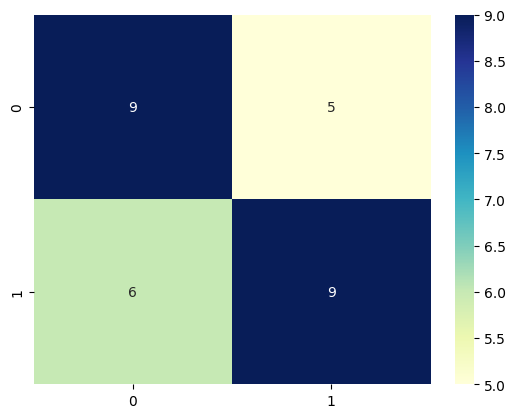

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="YlGnBu")

## Accuracy

In [24]:
print(f"Accuracy : {accuracy_score(y_test, y_pred)}")

Accuracy : 0.6206896551724138


# K-Nearest Neighbor

## Making A Model

In [25]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

## Predicting Result

In [26]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [0 1]
 [0 1]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]]


## Confusion Matrix

<Axes: >

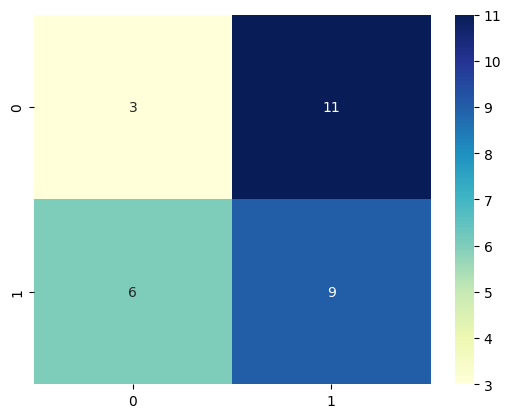

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="YlGnBu")

## Accuracy

In [28]:
print(f"Accuracy : {accuracy_score(y_test, y_pred)}")

Accuracy : 0.41379310344827586


# Decision Tree

## Making A Model

In [29]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

## Predicting Result

In [30]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 1]]


## Confusion Matrix

<Axes: >

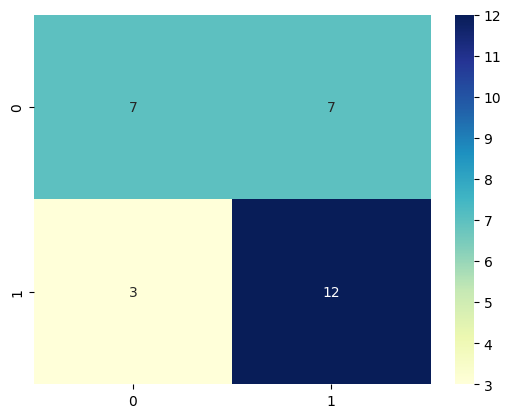

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="YlGnBu")

## Accuracy

In [32]:
print(f"Accuracy : {accuracy_score(y_test, y_pred)}")

Accuracy : 0.6551724137931034


# Logistic Regression

## Making A Model

In [33]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Predicting Result

In [38]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 1]]


## Confusion Matrix

<Axes: >

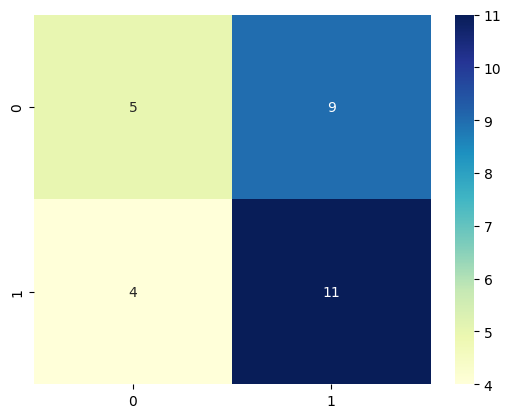

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="YlGnBu")

## Accuracy

In [36]:
print(f"Accuracy : {accuracy_score(y_test, y_pred)}")

Accuracy : 0.5517241379310345


# Support Vector Machine

## Making A Model

In [37]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

## Predicting Result

In [39]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 1]]


## Confusion Matrix

<Axes: >

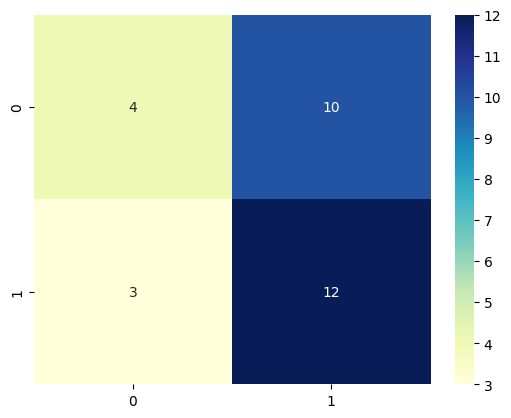

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="YlGnBu")

## Accuracy

In [41]:
print(f"Accuracy : {accuracy_score(y_test, y_pred)}")

Accuracy : 0.5517241379310345


# Kernel SVM

## Making A Model

In [42]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

## Predicting Result

In [43]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 1]]


# Confusion Matrix

<Axes: >

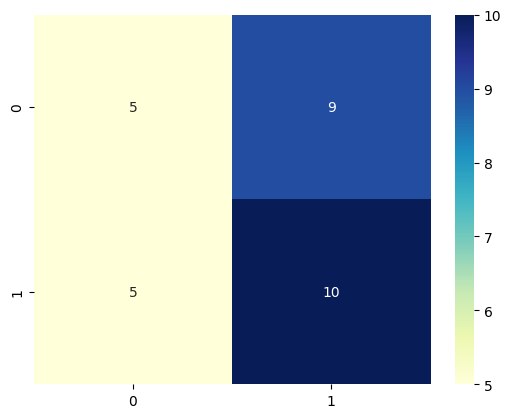

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="YlGnBu")

In [45]:
print(f"Accuracy : {accuracy_score(y_test, y_pred)}")

Accuracy : 0.5172413793103449


# Naive Bayes

In [46]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

## Predicting Result

In [47]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 1]]


## Confusion Matrix

<Axes: >

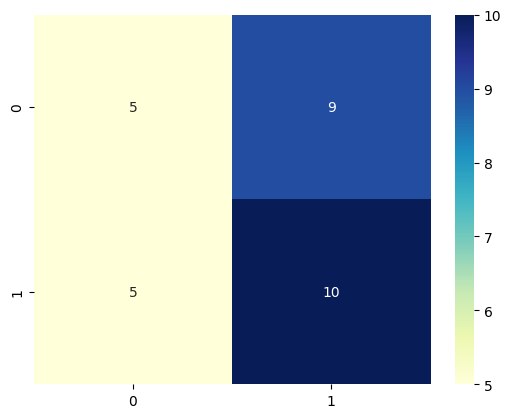

In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="YlGnBu")

## Accuracy

In [49]:
print(f"Accuracy : {accuracy_score(y_test, y_pred)}")

Accuracy : 0.5172413793103449


# Conclusion

The highest accuracy is Decision Tree algorithm with accuracy **0.66** or equal to **66 %** since the acceptable accuracy is 70 % or higher this model still need optimizations

# Optimization

In this optimization we use tuning method by checking the random state and accuracy

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
rs = []
acc = []
for i in range (2000):
  classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = i)
  rs.append(i)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  acc.append(accuracy_score(y_test, y_pred))

In [79]:
opt = pd.DataFrame({"Random State":rs,"Accuracy":acc})
opt.sort_values('Accuracy', ascending=False).head()

,Random State,Accuracy
1999,1999,0.689655
742,742,0.689655
1539,1539,0.689655
605,605,0.689655
608,608,0.689655
